<a href="https://colab.research.google.com/github/hyuk-k/hyuk-k/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1차원 데이터
## 데이터 중심의 지표
- 수치 계산과 통계분석에 필요한 라이브러리 임포트
- 출력을 소수점 이하 3자리로 설정


In [1]:
import numpy as np
import pandas as pd

# 주피터노트북의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision',3)

- 데이터(50명 학생의 영어, 수학 점수) 입력

In [2]:
df = pd.read_csv('scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


- 학번 순서대로 10명의 영어 점수를 array 데이터 구조 scores에 저

In [3]:
scores = np.array(df['english'])[:10]
scores


array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

- 데이터프레임 scores_df 작성

In [4]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A','B','C','D','E',
                                         'F','G','H','I','J'],
                                        name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 평균값
- 평균값은 데이터를 모두 더한 뒤, 데이터의 개수로 나누어 구함

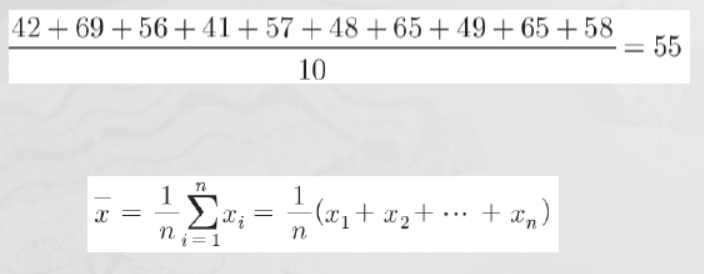

- sum(scores)이 시그마, len(scores)이 n에 대

In [5]:
sum(scores)/len(scores)

55.000

In [6]:
np.mean(scores)

55.000

In [7]:
scores_df.mean()

score    55.0
dtype: float64

## 평균과 중앙값
- 평균과 중앙값

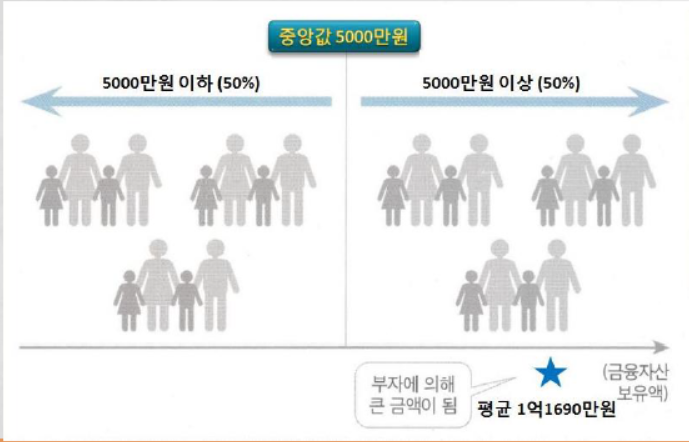

## 중앙값
- 중앙값은 데이터를 크기 순서대로 나열할 때 정확히 중앙에 위치한 값
- 이상값에 영향을 덜 받음

- 정렬 후 코드 작성 및 실행

In [8]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [9]:
n = len(sorted_scores)
if n % 2 == 0:
  m0 = sorted_scores[n//2 - 1]
  m1 = sorted_scores[n//2]
  median = (m0 + m1) / 2
else:
  median = sorted_scores[(n+1)//2 - 1]
median

56.500

In [10]:
np.median(scores)

56.500

In [11]:
scores_df.median()

score    56.5
dtype: float64

## 절사평균
- 절사평균(Trimmed Mean)
- 양쪽 좀 자르고 나머지들의 평균
- 이상값(outlier)에 영향을 별로 받지 않음
- 정보의 손실이 적음

- 10% 절사평균
  - 예> 20개의 자료 중 양쪽에서 하나씩 모두 2개를 제거한 뒤 18개의 평균
- 20% 절사평균
  - 예> 20개의 자료 중 양쪽에서 두개씩 모두 4개를 제거한 뒤 16개의 평균
- 다이빙 점수
  - 7명의 심판 중 최고점과 최저점을 제외하고 5명의 평균에 난이도를 고려해서 계산

## 최빈값
- 최빈값은 데이터에서 가장 많이 나타나는 값
- [1,1,1,2,2,3]에서 최빈값은 1
- DataFrame, Series의 mode 매서드

In [12]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [13]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 분산과 표준편차

- 편차
- 각 데이터가 평균으로부터 떨어져있는 정도
- 각 학생의 성적 편차

In [14]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [15]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

- 편차 비교
- scores의 편차가 더 큼

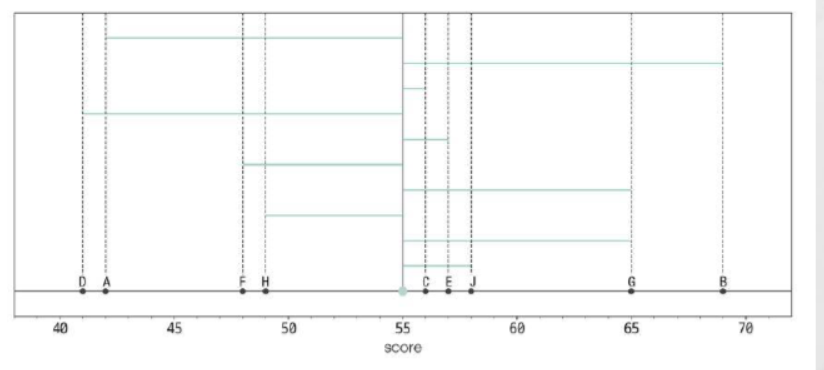

- 편차비교
- 10명의 편차값으로 비교가 어려우므로, 하나의 값인 편차 평균 비교
- 편차 평균 0

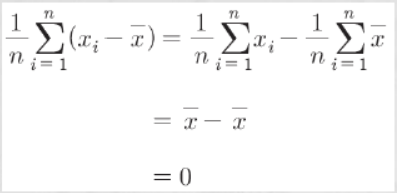

In [16]:
np.mean(deviation)

0.000

In [17]:
np.mean(another_deviation)

0.000

In [18]:
summary_df = scores_df.copy()
summary_df['deviation']=deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [19]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

## 분산과 표준편차
- 분산
- 산포도의 지표인 편차의 평균은 항상 0
- 앞의 B학생과 D학생은 모두 평균에서 14점 떨어져 동일 정도의 산포도를 가짐
- 단순히 더하면 서로 상쇄되어 0이 되므로 편차의 제곱을 이용
- 편차 제곱의 평균이 분산(모분산)

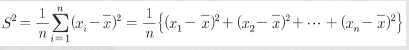

In [20]:
np.mean(deviation**2)

86.000

In [21]:
np.var(scores)

86.000

In [22]:
scores_df.var()

score    95.556
dtype: float64

- summary_df에 편차의 제곱 열 추가

In [23]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [24]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

- 편차 제곱은 한 변의 길이가 편차인 정사각형의 면적으로 간주하면, 분산은 면적의 평균
  - 중앙의 가로선과 세로선은 4명의 평균점수
  - A, B, C, D 각각은 시험점수
  - 각 회색의 정사각형이 편차 제곱
  - 정사각형의 평균이 중앙의 정사각형
  - 중앙 정사각형의 면적이 분산

  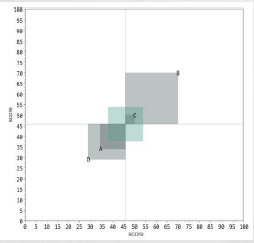

- 표준편차
- 분산은 점수의 제곱
- 영어 점수의 분산은 86점 제곱
- 원래의 데이터와 동일한 단위를 쓰는 산포도 지표가 필요
- 분산에 제곱근을 취한 것이 표준편차

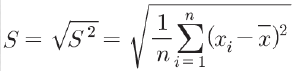

In [25]:
np.sqrt(np.var(scores, ddof=0))

9.274

In [28]:
np.std(scores, ddof = 0)

9.274

- 원래 데이터와 동일한 단위이므로 동일 차원으로 그릴 수 있음

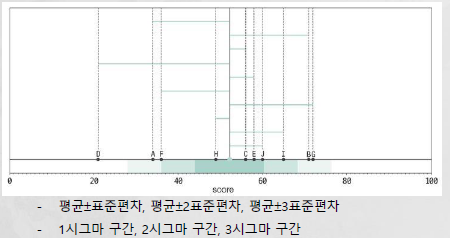

## 범위와 사분위 범위
- 범위
- 데이터 전체가 아니라 최댁밧과 최솟값만으로 산포도 표현

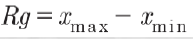

In [29]:
np.max(scores) - np.min(scores)

28

- 사분위 범위
- 상위수%와 하위수%에 위치하는 값의 차이
- 데이터의 하위 25%, 50%, 75%에 위치하는 값은 각각 제 1사분위수(Q1), 제2사분위수(Q2), 제3사분위수(Q30
- 사분위 범위 [IQR = Q3 - Q1]



In [30]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

## 상자수염 그림
- 상자수염 그림

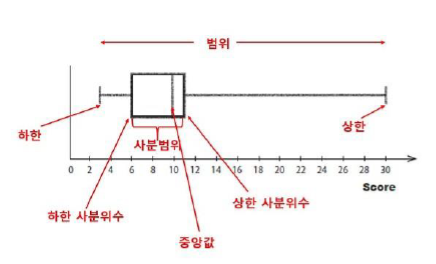

## 데이터의 지표 정리
- 데이터의 지표 정리

In [31]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 참고: 표준점수
- 표준점수

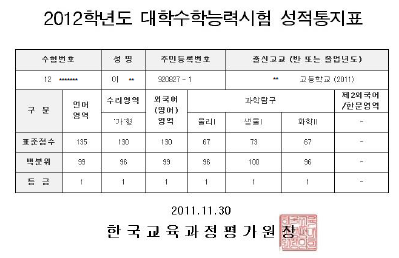

# 데이터의 정규화
## 표준화
- 표준화
- 상대적 결과가 다르므로 통일된 지표로 변환하는 정규화
- 데이터에서 평균을 빼고 표준편차로 나누는 작업
- 표준화된 데이터는 표준화 변량 혹은 Z점수

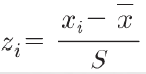

In [32]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

- 표준화된 데이터는 평균이 0, 표준편차가 1

In [33]:
np.mean(z), np.std(z,ddof=0)

(-0.000, 1.000)

## 편차값
- 편차값
- 평균이 50, 표준편차가 10이 되도록 정규화한 값

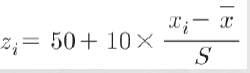

In [34]:
z = 50 +10*(scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

- 점수와 편차값의 관계

In [35]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


- 어떤학생이 평균 성적을 얻엇고, 어떤학생이 우수한 성적을 얻었는지 알 수 있음

## 데이터의 주요 지표
- 데이터의 주요 지표

In [36]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

# 데이터의 시각화
## 도수분포표
- 데이터의 분포 상태를 세부적으로 알고 싶을때,
- 데이터가 취하는 값을 몇 개의 구간으로 나누고,
- 각 구간에 몇개의 데이터가 들어가는가를 세는 방법
- 분할된 구간과 데이터의 개수를 정리한 표가 도수분포표
  - 계급: 시험 점수를 10점 간격으로 나눌 때 0~10점 구간 등
  - 도수: 각 계급에 속한 학생 수
  - 계급폭: 각 구간의 폭, 10점
  - 게급수: 계급의 수, 10

- 도수분포표 작성

In [37]:
freq, _ =np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [38]:
# 0-10, 10- 20, ..... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}'for i in range(0,100,10)]
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


## 참고: for문과 range()함수

In [39]:
for a in range(7):
  print(a)

0
1
2
3
4
5
6


In [40]:
for a in range(10,5,-1):
  print(a)

10
9
8
7
6


In [41]:
for a in range(20,31,2):
  print(a)

20
22
24
26
28
30


In [42]:
total = 0
for i in range(1,10):
  total = total + i
  print(total)

1
3
6
10
15
21
28
36
45


In [43]:
total = 0
for i in range(1,10,2):
  total = total + i
  print(total)

1
4
9
16
25


## 계급값
- 각 계급을 대표하는 값으로, 계급의 중앙값을 이용

In [44]:
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

## 도수분포표
- 상대도수
- 전체 데이터에 대해서 해당 계급의 데이터가 차지하는 비율

In [45]:
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

- 누적상대도수
- 해당 계급까지의 상대도수의 합

In [46]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

- 계급값, 상대도수, 누적상대도수를 도수분포표에 추가

In [47]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value','frequency','relative frequency','cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


- 최빈값
- 최대가 되는 계급의 계급값

In [48]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

- 도수분포표를 만드는 방법에 좌우되므로, 계급폭을 4점으로 하면 최빈값은 66점

## 히스토그램
- 도수분포표를 막대그래프로 나타내어 데이터의 분포상태를 더 시각적으로 파악 가능
- 그래프 그리는데 필요한 matplotlib 라이브러리 임포트

In [49]:
# matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

# 그래프 notebook 위에 표시
%matplotlib inline

- 히스토그램은 hist 매서드(Numpy의 histogram 함수와 동일)

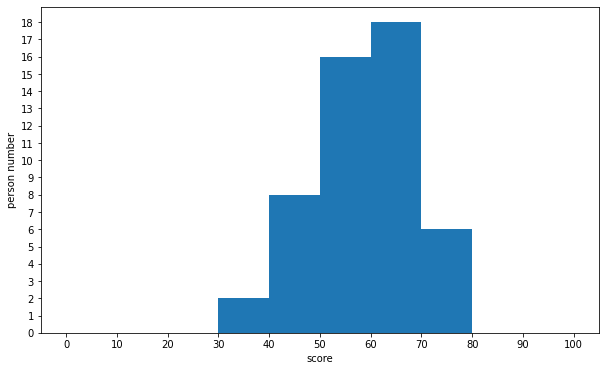

In [50]:
# 캔버스를 생성
# figsize로 가로, 세로 크기를 지정
fig = plt.figure(figsize=(10,6))
# 캔버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1X1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))
# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')
# X축을 0, 10, 20....,100 눈금으로 구분
ax.set_xticks(np.linspace(0,100,10+1))
# Y축을 0,1,2,...의 눈금으로 구분
ax.set_yticks(np.arange(0,freq.max()+1))
# 그래프 표시
plt.show()

- 계급수를 25, 즉 계급폭을 4점으로 하는 히스토그램을 누적 상대도수의 꺾은선 그래프와 함께 그림

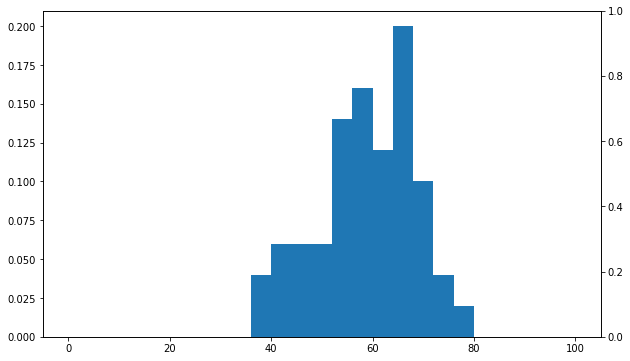

In [51]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0,100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

- 계급수를 25, 즉 계급폭을 4점으로하는 히스토그램을 누적 상대도수의 꺽은선 그래프와 함께 그림

In [55]:
# 꺽은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그림
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 꺽은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()

## 상자그림
- 데이터의 분포와 이상값을 시각적으로 파악 가능

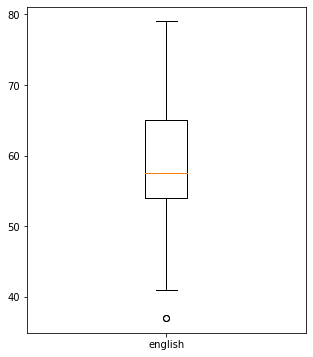

In [56]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()